In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
from scipy.stats import linregress

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

In [3]:
# output cities to a csv file
with open(output_data_file, 'w',newline='') as csvfile:
    csvwriter=csv.writer(csvfile,delimiter=',')
    for city in cities:
        csvwriter.writerow([city])  # make every element a list to output a csv file only containing one column
    

In [7]:
# send api requests
latitude=[]
humidity=[]
temperature_max=[]
cloudiness=[]
wind_speed=[]
city_found=[]
print('Beginning Data Retrieval')
print('------------------------')
for index,city_name in enumerate(cities):
    try:
        url='https://api.openweathermap.org/data/2.5/weather?'
        city=city_name
        units='imperial'
        query_url=f'{url}appid={api_key}&q={city}&units={units}'
        response=requests.get(query_url).json()
        latitude.append(response['coord']['lat'])
        humidity.append(response['main']['humidity'])
        temperature_max.append(response['main']['temp_max'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        print(f'Processing city {index+1}|{city_name}')
        city_found.append(city_name)
    except KeyError:
        print(f'City not found. Skipping............')
        

Beginning Data Retrieval
------------------------
Processing city 1|cape town
Processing city 2|yulara
Processing city 3|mitu
City not found. Skipping............
Processing city 5|east london
City not found. Skipping............
Processing city 7|dikson
Processing city 8|fortuna
Processing city 9|traralgon
Processing city 10|hilo
Processing city 11|coro
Processing city 12|miles city
Processing city 13|petropavlovsk-kamchatskiy
City not found. Skipping............
City not found. Skipping............
Processing city 16|vila franca do campo
Processing city 17|ushuaia
Processing city 18|guerrero negro
Processing city 19|jamestown
Processing city 20|cayenne
Processing city 21|hermanus
City not found. Skipping............
Processing city 23|kodiak
Processing city 24|coolum beach
Processing city 25|itarema
Processing city 26|saskylakh
Processing city 27|yellowknife
Processing city 28|bridgetown
Processing city 29|saint-philippe
Processing city 30|rikitea
Processing city 31|alta floresta
Pro

Processing city 272|chernyshevskiy
Processing city 273|winchester
Processing city 274|zhezkazgan
Processing city 275|anchorage
Processing city 276|kijang
Processing city 277|campobello di mazara
Processing city 278|jackson
Processing city 279|ilulissat
Processing city 280|alofi
Processing city 281|oistins
Processing city 282|tambo
Processing city 283|mercedes
Processing city 284|cururupu
Processing city 285|abu samrah
Processing city 286|amapa
Processing city 287|isilkul
Processing city 288|pervomayskoye
Processing city 289|shache
Processing city 290|powell river
Processing city 291|basoko
Processing city 292|platanos
Processing city 293|khandyga
Processing city 294|dawei
Processing city 295|senador jose porfirio
Processing city 296|lai
Processing city 297|cabo san lucas
Processing city 298|margate
Processing city 299|axim
Processing city 300|magalia
Processing city 301|balsas
Processing city 302|dehui
Processing city 303|grand-lahou
Processing city 304|pangnirtung
Processing city 305|

Processing city 546|elizabeth city
Processing city 547|tawau
Processing city 548|kahului
City not found. Skipping............
Processing city 550|san matias
Processing city 551|el alto
Processing city 552|dryden
Processing city 553|quesnel
Processing city 554|mandera
Processing city 555|reriutaba
Processing city 556|kushiro
City not found. Skipping............
Processing city 558|morgan city
Processing city 559|pedasi
Processing city 560|labuhan
Processing city 561|lensk
Processing city 562|aiquile
Processing city 563|puri
Processing city 564|dzhebariki-khaya
Processing city 565|lumajang
Processing city 566|mehamn
Processing city 567|remedios
Processing city 568|hinton
Processing city 569|olbia
Processing city 570|lata
Processing city 571|karpathos
City not found. Skipping............
Processing city 573|sri aman
Processing city 574|dudinka
Processing city 575|mendi
Processing city 576|boden
Processing city 577|tansen
Processing city 578|ouargaye
Processing city 579|quelimane
Processin

In [8]:
# store response in a datafame
cities_df=pd.DataFrame({'City':city_found,
                        'Humidity (%)':humidity,
                        'Latitude':latitude,
                        'Max Temperature (F)':temperature_max,
                        'Cloudiness (%)':cloudiness,
                        'Wind Speed (mph)':wind_speed})
cities_df.head()

,City,Humidity (%),Latitude,Max Temperature (F),Cloudiness (%),Wind Speed (mph)
0,cape town,93,-33.93,46.00,0,2.24
1,yulara,29,-25.24,64.40,0,9.17
2,mitu,46,36.20,68.27,0,4.00
3,east london,70,-33.02,46.40,0,8.05
4,dikson,100,73.51,40.55,100,6.31


In [9]:
cities_df.to_csv('city_info.csv',index=False,header=True) #output results to a csv file. don't have to run api requests again

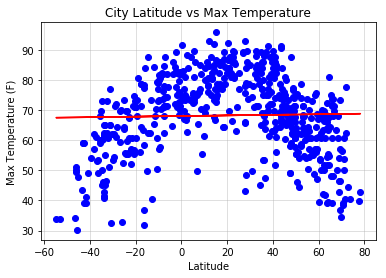

0.5576345763185341
0.02496449233972211


In [28]:
#City Latitude vs Max Temperature
plt.plot(cities_df['Latitude'], cities_df['Max Temperature (F)'], 'bo')
plt.grid(alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature')
t_slope, t_intercept, t_r_value, t_p_value, t_std_err=linregress(cities_df['Latitude'], cities_df['Max Temperature (F)'])
t_fit=t_slope*cities_df['Latitude']+ t_intercept
plt.plot(cities_df['Latitude'],t_fit,'r-')
plt.savefig('l_mf.png')
plt.show()
print(t_p_value)
print(t_r_value)

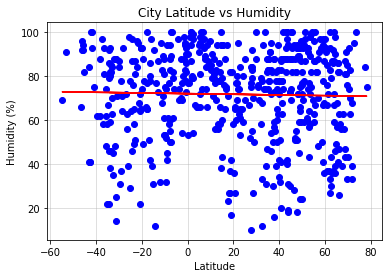

0.5749241472904856
-0.02387724939211677


In [29]:
#City Latitude vs Humidity
plt.plot(cities_df['Latitude'], cities_df['Humidity (%)'], 'bo')
plt.grid(alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity')
h_slope, h_intercept, h_r_value, h_p_value, h_std_err=linregress(cities_df['Latitude'], cities_df['Humidity (%)'])
h_fit=h_slope*cities_df['Latitude']+ h_intercept
plt.plot(cities_df['Latitude'],h_fit,'r-')
plt.savefig('l_h.png')
plt.show()
print(h_p_value)
print(h_r_value)

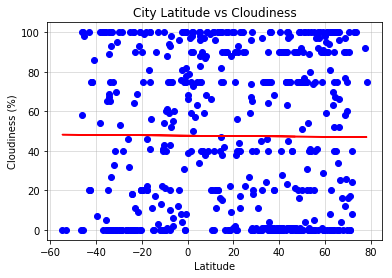

0.8501447206674122
-0.008045068177875182


In [31]:
#City Latitude vs Cloudiness
plt.plot(cities_df['Latitude'], cities_df['Cloudiness (%)'], 'bo')
plt.grid(alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness')
c_slope, c_intercept, c_r_value, c_p_value, c_std_err=linregress(cities_df['Latitude'], cities_df['Cloudiness (%)'])
c_fit=c_slope*cities_df['Latitude']+ c_intercept
plt.plot(cities_df['Latitude'],c_fit,'r-')
plt.savefig('l_c.png')
plt.show()
print(c_p_value)
print(c_r_value)

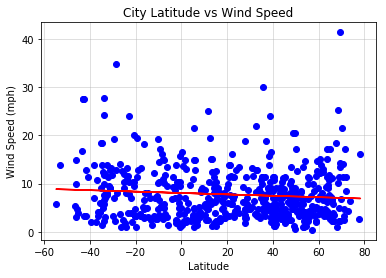

0.0355142375356166
-0.08934745887584637


In [30]:
#City Latitude vs Wind Speed
plt.plot(cities_df['Latitude'], cities_df['Wind Speed (mph)'], 'bo')
plt.grid(alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed')
w_slope, w_intercept, w_r_value, w_p_value, w_std_err=linregress(cities_df['Latitude'], cities_df['Wind Speed (mph)'])
w_fit=w_slope*cities_df['Latitude']+ w_intercept
plt.plot(cities_df['Latitude'],w_fit,'r-')
plt.savefig('l_w.png')
plt.show()
print(w_p_value)
print(w_r_value)

In [27]:
# linear regession results in a dataframe
analysis_df=pd.DataFrame({'P Value':[t_p_value,h_p_value,c_p_value,w_p_value],
                         'Correlation Coefficient':[t_r_value,h_r_value,c_r_value,w_r_value]},
                         index=['City Latitude vs Max Temperature','City Latitude vs Humidity','City Latitude vs Cloudiness','City Latitude vs Wind Speed'])
analysis_df

,P Value,Correlation Coefficient
City Latitude vs Max Temperature,0.557635,0.024964
City Latitude vs Humidity,0.574924,-0.023877
City Latitude vs Cloudiness,0.850145,-0.008045
City Latitude vs Wind Speed,0.035514,-0.089347
